In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/amazon-sales-dataset/amazon.csv


# Setting 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## DATA CLEANING & PREPARATION
Before making analyzing the data, it is important to clean and prepare data. The methods used to clean and prepare the data are as listed below:

1. Changing Data Types of Columns from object to Floats
2. Filling in Missing Information
3. Checking For Duplicate Rows
4. Splitting Long Strings
5. Creating Various New Columns

In [3]:
df = pd.read_csv('/kaggle/input/amazon-sales-dataset/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [4]:
#checking somethings in dataset
print("Data Columns:",df.columns)
print("Data Shape:", df.shape)
print("Data Types:", df.dtypes)

Data Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')
Data Shape: (1465, 16)
Data Types: product_id             object
product_name           object
category               object
discounted_price       object
actual_price           object
discount_percentage    object
rating                 object
rating_count           object
about_product          object
user_id                object
user_name              object
review_id              object
review_title           object
review_content         object
img_link               object
product_link           object
dtype: object


In [5]:
#Changing the data type of discounted price and actual price
df['discounted_price'] = df['discounted_price'].str.replace("₹",'')
df['discounted_price'] = df['discounted_price'].str.replace(",",'')
df['discounted_price'] = df['discounted_price'].astype('float64')

df['actual_price'] = df['actual_price'].str.replace("₹",'')
df['actual_price'] = df['actual_price'].str.replace(",",'')
df['actual_price'] = df['actual_price'].astype('float64')
# df.head(2)

In [6]:
#Changing Datatype and values in Discount Percentage

df['discount_percentage'] = df['discount_percentage'].str.replace('%','').astype('float64')
df['discount_percentage'] = df['discount_percentage'] / 100

In [7]:
#Finding unusual string in the rating column
df['rating'].value_counts()

4.1    244
4.3    230
4.2    228
4.0    129
3.9    123
4.4    123
3.8     86
4.5     75
4       52
3.7     42
3.6     35
3.5     26
4.6     17
3.3     16
3.4     10
4.7      6
3.1      4
5.0      3
3.0      3
4.8      3
3.2      2
2.8      2
2.3      1
|        1
2        1
3        1
2.6      1
2.9      1
Name: rating, dtype: int64

In [8]:
#Inspecting the strange row
df.query('rating == "|"')

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
1279,B08L12N5H1,Eureka Forbes car Vac 100 Watts Powerful Sucti...,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cle...",2099.0,2499.0,0.16,|,992,No Installation is provided for this product|1...,"AGTDSNT2FKVYEPDPXAA673AIS44A,AER2XFSWNN4LAUCJ5...","Divya,Dr Nefario,Deekshith,Preeti,Prasanth R,P...","R2KKTKM4M9RDVJ,R1O692MZOBTE79,R2WRSEWL56SOS4,R...","Decent product,doesn't pick up sand,Ok ok,Must...","Does the job well,doesn't work on sand. though...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Eureka-Forbes-Vacuum-Cle...


In [9]:
#I went to the amazon page to get the rating and found that the product id of 
#B08L12N5H1 has a rating of 4. So I am going to give the item rating a 4.0 as well.(reference)
#Source: https://www.amazon.in/Eureka-Forbes-Vacuum-Cleaner-Washable/dp/B08L12N5H1
df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')

/tmp/ipykernel_32/1801362587.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['rating'] = df['rating'].str.replace('|', '4.0').astype('float64')


In [10]:
#Changing Rating Column Data Type
df['rating_count'] = df['rating_count'].str.replace(',', '').astype('float64')

In [11]:
#Checking for Duplicates
duplicates = df.duplicated()
df[duplicates]

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link


In [12]:
#Checking Missing Values
df.isna().sum()

product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [13]:
#Creating a new DataFrame with Selected Column
df1 = df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']].copy()

In [14]:
#Splitting the Strings in the category column
catsplit = df['category'].str.split('|', expand=True)
catsplit

,0,1,2,3,4,5,6
0,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
1,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
2,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
3,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
4,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables,USBCables,None,None
...,...,...,...,...,...,...,...
1460,Home&Kitchen,Kitchen&HomeAppliances,WaterPurifiers&Accessories,WaterPurifierAccessories,None,None,None
1461,Home&Kitchen,Kitchen&HomeAppliances,SmallKitchenAppliances,Rice&PastaCookers,None,None,None
1462,Home&Kitchen,"Heating,Cooling&AirQuality",RoomHeaters,HeatConvectors,None,None,None
1463,Home&Kitchen,"Heating,Cooling&AirQuality",Fans,ExhaustFans,None,None,None


In [15]:
#Renaming category column
catsplit = catsplit.rename(columns={0:'category_1', 1:'category_2', 2:'category_3'})

In [16]:
#Adding categories to the new dataframe
df1['category_1'] = catsplit['category_1']
df1['category_2'] = catsplit['category_2']

df1.drop(columns='category', inplace=True)

df1

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers&Accessories,Accessories&Peripherals
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers&Accessories,Accessories&Peripherals
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers&Accessories,Accessories&Peripherals
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers&Accessories,Accessories&Peripherals
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers&Accessories,Accessories&Peripherals
...,...,...,...,...,...,...,...,...,...
1460,B08L7J3T31,Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...,379.0,919.0,0.59,4.0,1090.0,Home&Kitchen,Kitchen&HomeAppliances
1461,B01M6453MB,Prestige Delight PRWO Electric Rice Cooker (1 ...,2280.0,3045.0,0.25,4.1,4118.0,Home&Kitchen,Kitchen&HomeAppliances
1462,B009P2LIL4,Bajaj Majesty RX10 2000 Watts Heat Convector R...,2219.0,3080.0,0.28,3.6,468.0,Home&Kitchen,"Heating,Cooling&AirQuality"
1463,B00J5DYCCA,Havells Ventil Air DSP 230mm Exhaust Fan (Pist...,1399.0,1890.0,0.26,4.0,8031.0,Home&Kitchen,"Heating,Cooling&AirQuality"


In [17]:
#Checking category_1 unique values
df1['category_1'].value_counts()

Electronics              526
Computers&Accessories    453
Home&Kitchen             448
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: category_1, dtype: int64

In [18]:
#Fixing Strings in the Category_1 Column
df1['category_1'] = df1['category_1'].str.replace('&', ' & ')
df1['category_1'] = df1['category_1'].str.replace('OfficeProducts', 'Office Products')
df1['category_1'] = df1['category_1'].str.replace('MusicalInstruments', 'Musical Instruments')
df1['category_1'] = df1['category_1'].str.replace('HomeImprovement', 'Home Improvement')

In [19]:
#Checking category_2 unique values
df1['category_2'].value_counts()

Accessories&Peripherals                    381
Kitchen&HomeAppliances                     308
HomeTheater,TV&Video                       162
Mobiles&Accessories                        161
Heating,Cooling&AirQuality                 116
WearableTechnology                          76
Headphones,Earbuds&Accessories              66
NetworkingDevices                           34
OfficePaperProducts                         27
ExternalDevices&DataStorage                 18
Cameras&Photography                         16
HomeStorage&Organization                    16
HomeAudio                                   16
GeneralPurposeBatteries&BatteryChargers     14
Accessories                                 14
Printers,Inks&Accessories                   11
CraftMaterials                               7
Components                                   5
OfficeElectronics                            4
Electrical                                   2
Monitors                                     2
Microphones  

In [20]:
#Fixing Strings in Category_2 column
df1['category_2'] = df1['category_2'].str.replace('&', ' & ')
df1['category_2'] = df1['category_2'].str.replace(',', ', ')
df1['category_2'] = df1['category_2'].str.replace('HomeAppliances', 'Home Appliances')
df1['category_2'] = df1['category_2'].str.replace('AirQuality', 'Air Quality')
df1['category_2'] = df1['category_2'].str.replace('WearableTechnology', 'Wearable Technology')
df1['category_2'] = df1['category_2'].str.replace('NetworkingDevices', 'Networking Devices')
df1['category_2'] = df1['category_2'].str.replace('OfficePaperProducts', 'Office Paper Products')
df1['category_2'] = df1['category_2'].str.replace('ExternalDevices', 'External Devices')
df1['category_2'] = df1['category_2'].str.replace('DataStorage', 'Data Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeStorage', 'Home Storage')
df1['category_2'] = df1['category_2'].str.replace('HomeAudio', 'Home Audio')
df1['category_2'] = df1['category_2'].str.replace('GeneralPurposeBatteries', 'General Purpose Batteries')
df1['category_2'] = df1['category_2'].str.replace('BatteryChargers', 'Battery Chargers')
df1['category_2'] = df1['category_2'].str.replace('CraftMaterials', 'Craft Materials')
df1['category_2'] = df1['category_2'].str.replace('OfficeElectronics', 'Office Electronics')
df1['category_2'] = df1['category_2'].str.replace('PowerAccessories', 'Power Accessories')
df1['category_2'] = df1['category_2'].str.replace('CarAccessories', 'Car Accessories')
df1['category_2'] = df1['category_2'].str.replace('HomeMedicalSupplies', 'Home Medical Supplies')
df1['category_2'] = df1['category_2'].str.replace('HomeTheater', 'Home Theater')

In [21]:
# Removing Whitespace from product_id
df1['product_id'].str.strip()

0       B07JW9H4J1
1       B098NS6PVG
2       B096MSW6CT
3       B08HDJ86NZ
4       B08CF3B7N1
           ...    
1460    B08L7J3T31
1461    B01M6453MB
1462    B009P2LIL4
1463    B00J5DYCCA
1464    B01486F4G6
Name: product_id, Length: 1465, dtype: object

In [22]:
#Creating Categories for Rankings
rating_score = []

for score in df1['rating']:
    if score < 2.0 : rating_score.append('Poor')
    elif score < 3.0 : rating_score.append('Below Average')
    elif score < 4.0 : rating_score.append('Average')
    elif score < 5.0 : rating_score.append('Above Average')
    elif score == 5.0 : rating_score.append('Excellent')

In [23]:
#Creating A new Column and Changing the Data Type
df1['rating_score'] = rating_score
df1['rating_score'] = df1['rating_score'].astype('category')

In [24]:
#Reordered Categories
df1['rating_score'] = df1['rating_score'].cat.reorder_categories(['Below Average', 'Average', 'Above Average', 'Excellent'], ordered=True)

In [25]:
#Creating Difference of Price Column between Actual Price and Discounted Price
df1['difference_price'] = df1['actual_price'] - df1['discounted_price']

In [26]:
#Result After Cleaning and Preperation after first cleaned dataframe
df1.head()

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [27]:
#Subsetting Reviewers Identifications
reviewers = df[['user_id','user_name','product_id']]
reviewers

,user_id,user_name,product_id
0,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...",B07JW9H4J1
1,"AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...",B098NS6PVG
2,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...",B096MSW6CT
3,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...",B08HDJ86NZ
4,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...",B08CF3B7N1
...,...,...,...
1460,"AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...","Prabha ds,Raghuram bk,Real Deal,Amazon Custome...",B08L7J3T31
1461,"AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...","Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...",B01M6453MB
1462,"AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...","Nehal Desai,Danish Parwez,Amazon Customer,Amaz...",B009P2LIL4
1463,"AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...","Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...",B00J5DYCCA


In [28]:
# Tách các giá trị trong cột "user_id" thành danh sách
reviewers["user_id"] = reviewers["user_id"].str.split(",")

# Chuyển đổi các giá trị trong cột "user_id" và "product_id" thành các bản ghi riêng biệt
expanded_rows = []
for index, row in reviewers.iterrows():
    user_ids = row["user_id"]
    product_id = row["product_id"]
    for user_id in user_ids:
        expanded_rows.append({"user_id": user_id, "product_id": product_id})

# Tạo một DataFrame mới từ danh sách các bản ghi đã được mở rộng
reviewers_user_id = pd.DataFrame(expanded_rows)

print(reviewers_user_id)

                            user_id  product_id
0      AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1
1      AHMY5CWJMMK5BJRBBSNLYT3ONILA  B07JW9H4J1
2      AHCTC6ULH4XB6YHDY6PCH2R772LQ  B07JW9H4J1
3      AGYHHIERNXKA6P5T7CZLXKVPT7IQ  B07JW9H4J1
4      AG4OGOFWXJZTQ2HKYIOCOY3KXF2Q  B07JW9H4J1
...                             ...         ...
11498  AHXCDNSXAESERITAFELQABFVNLCA  B01486F4G6
11499  AGRZD6CHLCUNOLMMIMIHUCG7PIFA  B01486F4G6
11500  AFQZVGSOSOJHKFQQMCEI4725QEKQ  B01486F4G6
11501  AEALVGXXIP46OZVXKRUXSDWZJMEA  B01486F4G6
11502  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6

[11503 rows x 2 columns]


/tmp/ipykernel_32/1859213076.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewers["user_id"] = reviewers["user_id"].str.split(",")


In [29]:
# Tách các giá trị trong cột "user_id" thành danh sách
reviewers["user_name"] = reviewers["user_name"].str.split(",")

# Chuyển đổi các giá trị trong cột "user_id" và "product_id" thành các bản ghi riêng biệt
expanded_rows = []
for index, row in reviewers.iterrows():
    user_ids = row["user_name"]
    product_id = row["product_id"]
    for user_id in user_ids:
        expanded_rows.append({"user_name": user_id, "product_id": product_id})

# Tạo một DataFrame mới từ danh sách các bản ghi đã được mở rộng
reviewers_user_name = pd.DataFrame(expanded_rows)

print(reviewers_user_name)

              user_name  product_id
0                 Manav  B07JW9H4J1
1          Adarsh gupta  B07JW9H4J1
2               Sundeep  B07JW9H4J1
3        S.Sayeed Ahmed  B07JW9H4J1
4        jaspreet singh  B07JW9H4J1
...                 ...         ...
11510           PARDEEP  B01486F4G6
11511  Anindya Pramanik  B01486F4G6
11512       Vikas Singh  B01486F4G6
11513   Harshada Pimple  B01486F4G6
11514            Saw a.  B01486F4G6

[11515 rows x 2 columns]


/tmp/ipykernel_32/3963786804.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reviewers["user_name"] = reviewers["user_name"].str.split(",")


In [30]:
#Creating 2 Data Frames to be merged
df21 = pd.DataFrame(data=reviewers_user_id)
df22 = pd.DataFrame(data=reviewers_user_name)

In [31]:
#Merging the 2 dataframe containing user_id and user_name
df2 = pd.merge(df21, df22,on="product_id", how="inner")

In [32]:
#Final Check for the new dataframe
df2

,user_id,product_id,user_name
0,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Manav
1,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Adarsh gupta
2,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,Sundeep
3,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,S.Sayeed Ahmed
4,AG3D6O4STAQKAY2UVGEUV46KN35Q,B07JW9H4J1,jaspreet singh
...,...,...,...
108712,AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ,B01486F4G6,PARDEEP
108713,AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ,B01486F4G6,Anindya Pramanik
108714,AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ,B01486F4G6,Vikas Singh
108715,AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ,B01486F4G6,Harshada Pimple


# DATA EXPLORATION

In [33]:
#Setting Visualization Style

sns.set_style(style='darkgrid')
sns.set_palette(palette="icefire")

## Observation 1: Product Category

Below are the list of Main Category and Sub-Category to help determine which sub-category belongs to which main category:

In [34]:
#Main Category and Sub-Category
main_sub = df1[['category_1', 'category_2', 'product_id']]
main_sub = main_sub.rename(columns={'category_1' :'Main Category', 'category_2' : 'Sub-Category', 'product_id':'Product ID'})
main_sub_piv = pd.pivot_table(main_sub, index=['Main Category', 'Sub-Category'], aggfunc='count')

main_sub_piv

Product ID
Main Category           Sub-Category                                            
Car & Motorbike         Car Accessories                                        1
Computers & Accessories Accessories & Peripherals                            381
                        Components                                             5
                        External Devices & Data Storage                       18
                        Laptops                                                1
                        Monitors                                               2
                        Networking Devices                                    34
                        Printers, Inks & Accessories                          11
                        Tablets                                                1
Electronics             Accessories                                           14
                        Cameras & Photography                                 16
                        General Purpose Batteries & Battery Chargers          14
                        Headphones, Earbuds & Accessories                     66
                        Home Audio                                            16
                        Home Theater, TV & Video                             162
                        Mobiles & Accessories                                161
                        Power Accessories                                      1
                        Wearable Technology                                   76
Health & PersonalCare   Home Medical Supplies & Equipment                      1
Home & Kitchen          Craft Materials                                        7
                        Heating, Cooling & Air Quality                       116
                        Home Storage & Organization                           16
                        Kitchen & Dining                                       1
                        Kitchen & Home Appliances                            308
Home Improvement        Electrical                                             2
Musical Instruments     Microphones                                            2
Office Products         Office Electronics                                     4
                        Office Paper Products                                 27
Toys & Games            Arts & Crafts                                          1

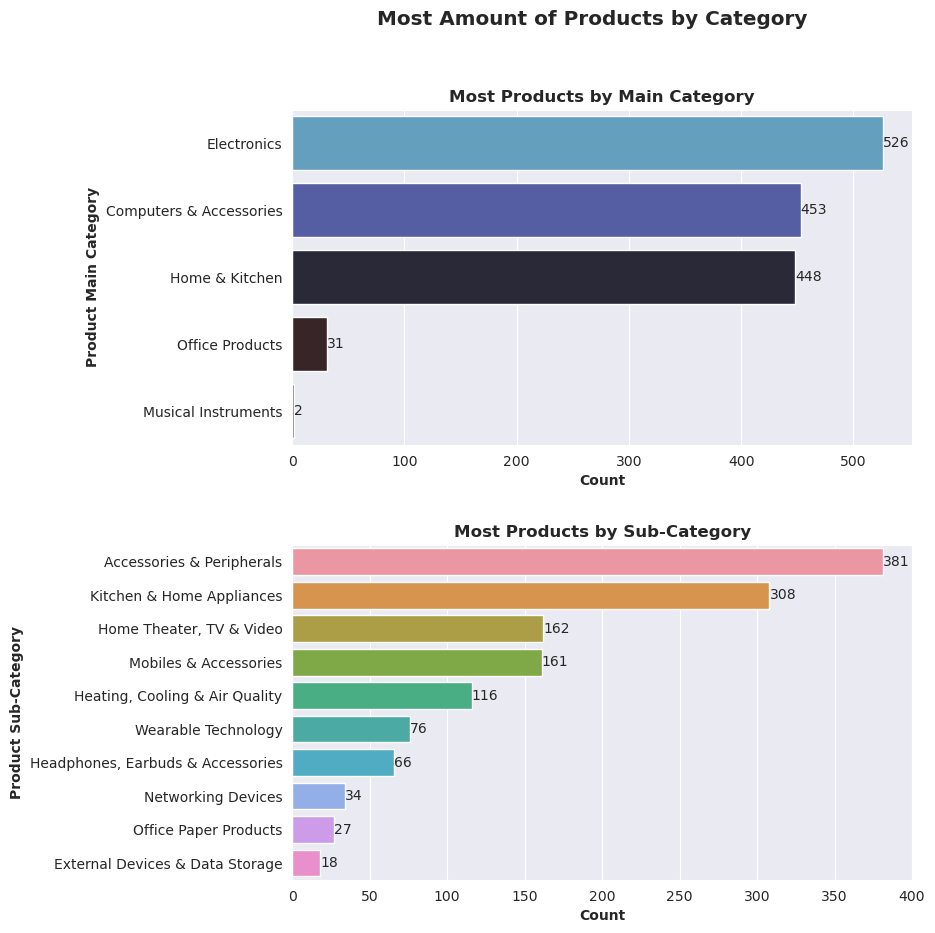

In [35]:
#Most amount of products by category

most_main_items = df1['category_1'].value_counts().head(5).rename_axis('category_1').reset_index(name='counts')
most_sub_items = df1['category_2'].value_counts().head(10).rename_axis('category_2').reset_index(name='counts')
fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Most Amount of Products by Category', fontweight='heavy', size='x-large')
sns.barplot(ax=ax[0], data=most_main_items, x='counts', y='category_1')
sns.barplot(ax=ax[1], data=most_sub_items, x='counts', y='category_2')
plt.subplots_adjust(hspace = 0.3)
ax[0].set_xlabel('Count', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_xlabel('Count', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[0].set_title('Most Products by Main Category', fontweight='bold')
ax[1].set_title('Most Products by Sub-Category', fontweight='bold')
ax[0].bar_label(ax[0].containers[0])
ax[1].bar_label(ax[1].containers[0])

plt.show()

Electronics especially acccessories & peripherals and kitchen & home appliances covers most of the products in this dataset. In general, this dataset contains mostly products closely related to electric devices

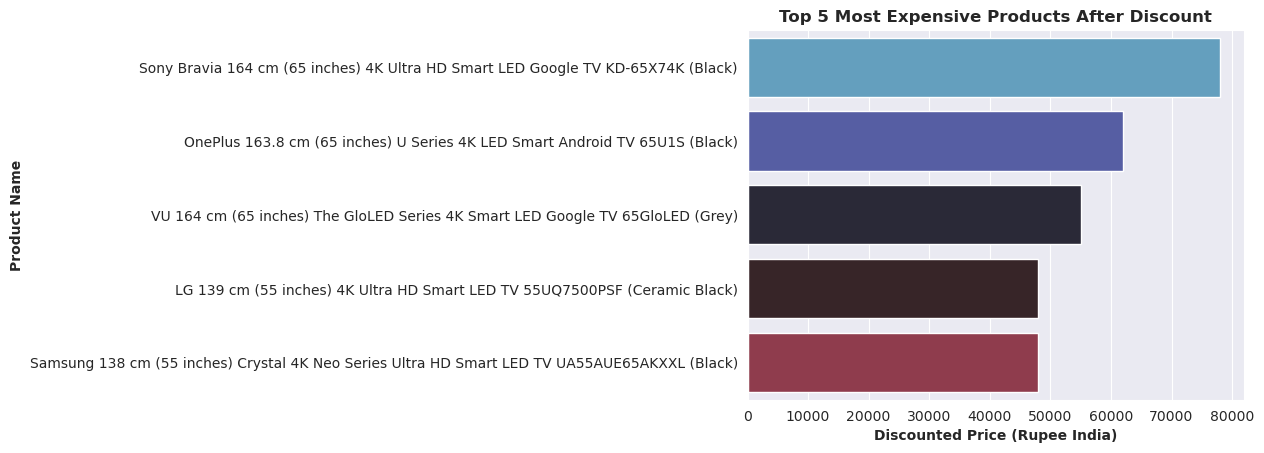

In [36]:
#Top 5 Most Expensive Products After Discount
disc_exp = sns.barplot(data=df1.sort_values('discounted_price', ascending=False).head(5), x='discounted_price', y='product_name')
disc_exp.set_title('Top 5 Most Expensive Products After Discount', fontweight='bold')
disc_exp.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_exp.set_ylabel('Product Name', fontweight='bold')

plt.show()

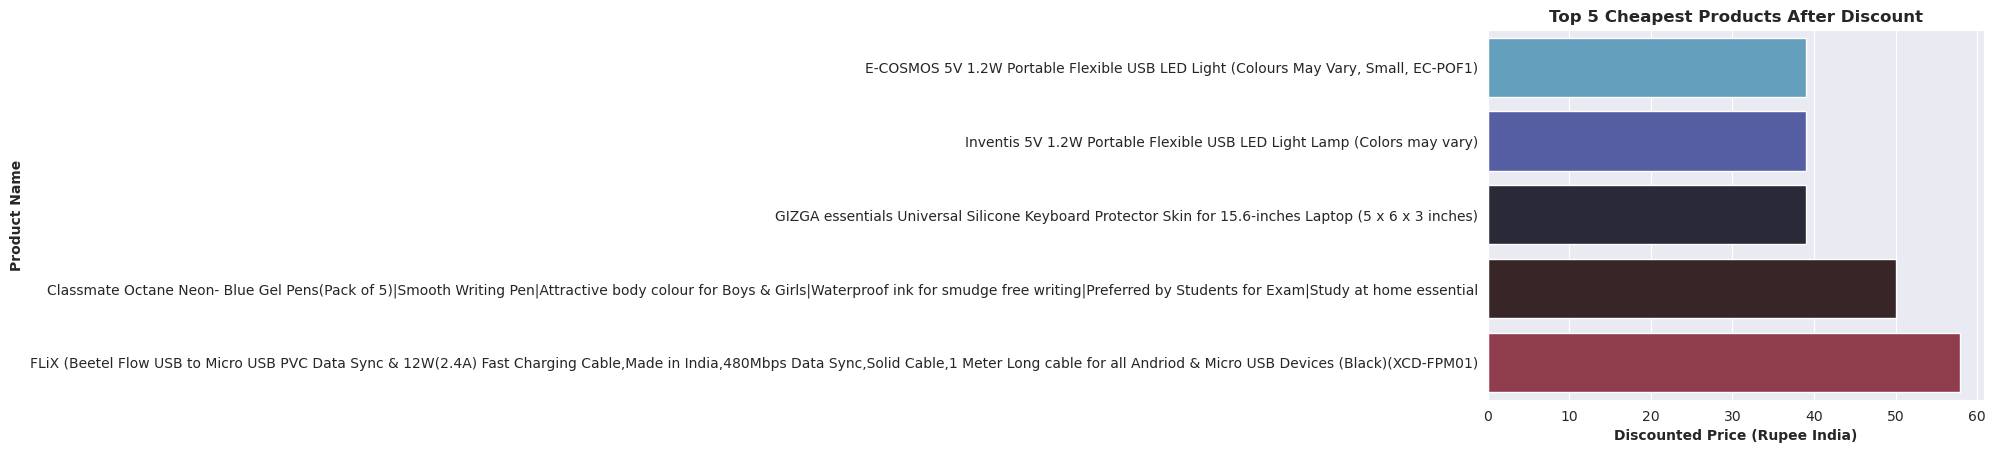

In [37]:
#Top 5 Cheapest Products After Discount
disc_cheap = sns.barplot(data=df1.sort_values('discounted_price').head(5), x='discounted_price', y='product_name')
disc_cheap.set_title('Top 5 Cheapest Products After Discount', fontweight='bold')
disc_cheap.set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
disc_cheap.set_ylabel('Product Name', fontweight='bold')

plt.show()


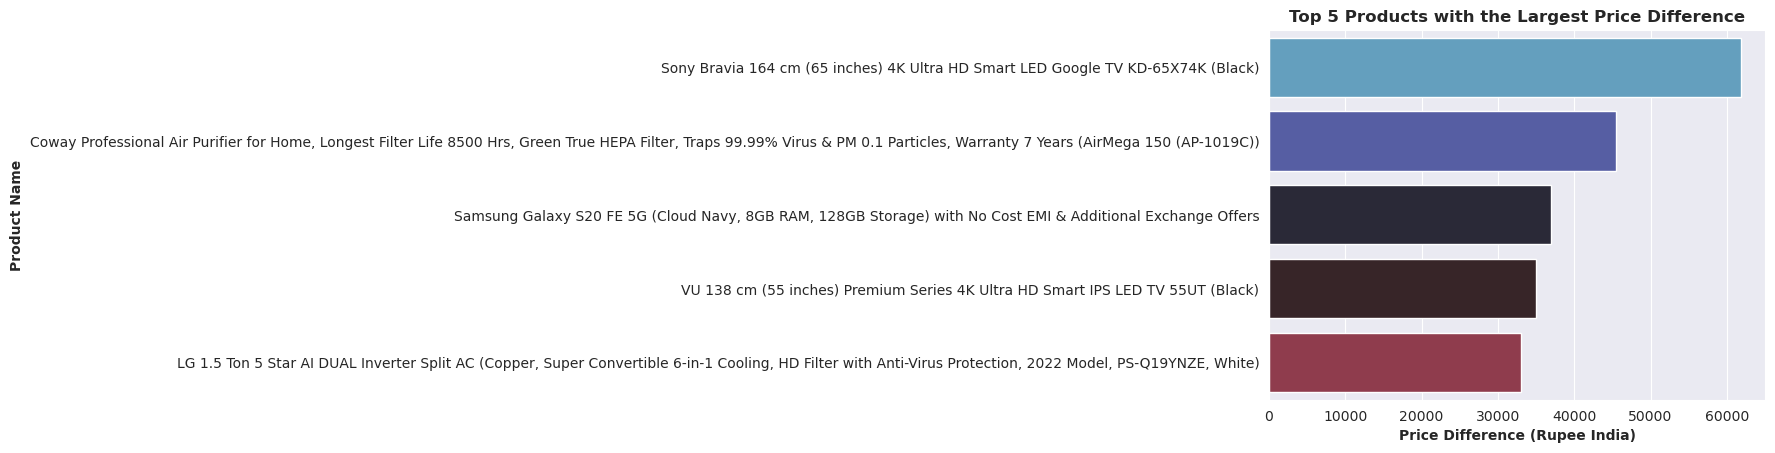

In [38]:
#Top 5 Products with the largest difference in price due to discount

dif_price_large = sns.barplot(data= df1.sort_values('difference_price', ascending=False).head(5), x='difference_price', y='product_name')
dif_price_large.set_title('Top 5 Products with the Largest Price Difference', fontweight='bold')
dif_price_large.set_xlabel('Price Difference (Rupee India)', fontweight='bold')
dif_price_large.set_ylabel('Product Name', fontweight='bold')

plt.show()

Observation 2: Correlation between Features

/tmp/ipykernel_32/1397356112.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ax=ax[0], data=df1.corr())


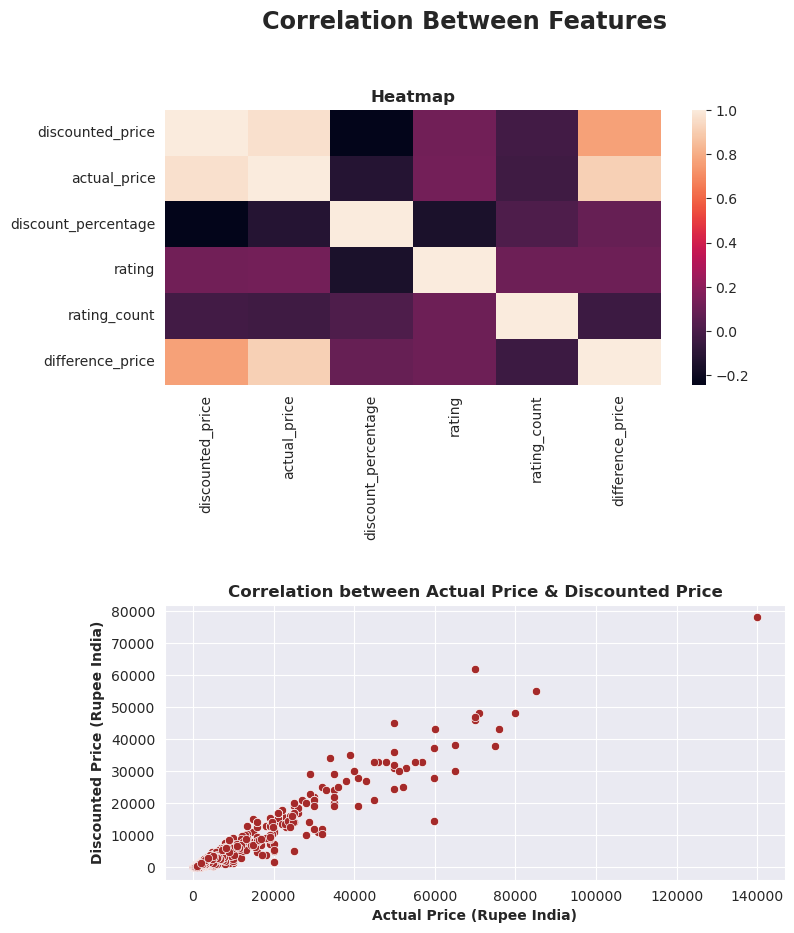

In [39]:
#Heatmap & Correlation between Actual Price & Discounted Price

fig, ax = plt.subplots(2, 1, figsize=(8, 10))
fig.suptitle('Correlation Between Features', fontweight='heavy', size='xx-large')
sns.heatmap(ax=ax[0], data=df1.corr())
sns.scatterplot(ax=ax[1], data=df1, y='discounted_price', x='actual_price', color='brown')
plt.subplots_adjust(hspace = 0.8)

ax[1].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Discounted Price (Rupee India)', fontweight='bold')
ax[0].set_title('Heatmap', fontweight='bold')
ax[1].set_title('Correlation between Actual Price & Discounted Price', fontweight='bold')

plt.show()

There are almost no correlation between the features in the dataset. Only the actual prices of products and the discounted prices of products have a positive correlation.

## Observation 3: Product Ratings


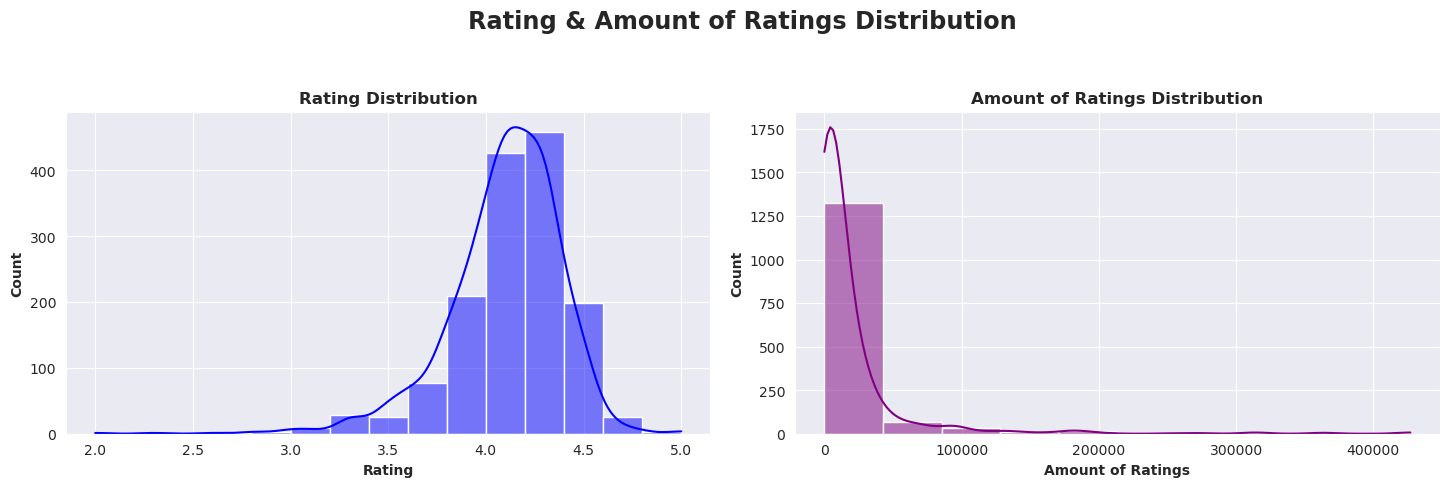

In [40]:
#Rating & Amount of Rating Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Rating & Amount of Ratings Distribution', fontweight='heavy', size='xx-large')
fig.tight_layout(pad=3.0)
sns.histplot(ax=ax[0], data=df1, x='rating', bins=15, kde=True, color='blue')
sns.histplot(ax=ax[1], data=df1, x='rating_count', bins=10, kde=True, color='purple')
ax[0].set_xlabel('Rating', fontweight='bold')
ax[1].set_xlabel('Amount of Ratings', fontweight='bold')
ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')
ax[0].set_title('Rating Distribution', fontweight='bold')
ax[1].set_title('Amount of Ratings Distribution', fontweight='bold')
plt.show()

Most of the product rating range around 4.0 - 4.375 with no products under the score of 2.0. The rating distribution in slightly left-skewed.

The amount of ratings given to a product is very widespread. Most of the products that have been rated, have around 0 - 5000 amount of rating for each product. Interestingly there are products that have more than 40,000 ratings. The amount of ratings distribution is highly right skewed.

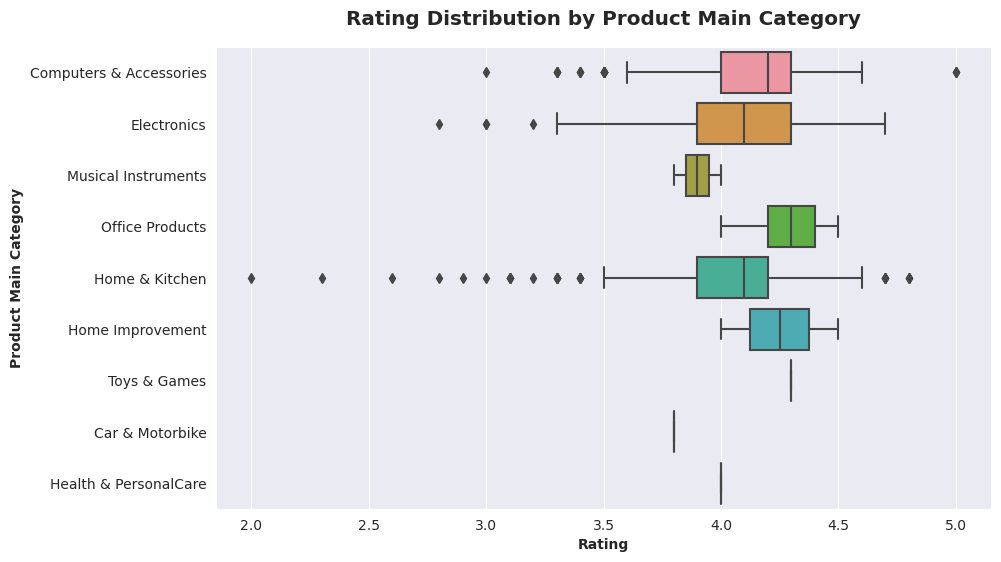

In [41]:
#Rating Distribution by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(ax=ax, data=df1, x='rating', y='category_1')
ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

Toys & Games, Car & Motorbike, and Health & Personal Care product ratings's are around 3.75 - 4.375. All Home Improvement, and Office Products have a minimal rating of 4.0.

Many of the Computer & Accessories, and Electronics products have ratings in the range of 3.6 - 4.6. Though these categories do have products that have a high rating such as 5.0 and low rating, going down to 2.75.

Noticeably, the Home & Kitchen products have a really widespread rating going to as high as 4.75 and going as low as 2.0 rating, which is the lowest rating out of all the products in this dataset. However, most of the products in this category fall in the range of around 3.8 - 4.6.

In [42]:
#Rating of Products based on Rating Category
rate_main_cat = df1.groupby(['category_1','rating_score']).agg('count').iloc[:,1].rename_axis().reset_index(name='Amount')
rate_main_cat = rate_main_cat.rename(columns = {'category_1' : 'Main Category', 'rating_score' : 'Rating Category'})

rate_main_cat

,Main Category,Rating Category,Amount
0,Car & Motorbike,Below Average,0
1,Car & Motorbike,Average,1
2,Car & Motorbike,Above Average,0
3,Car & Motorbike,Excellent,0
4,Computers & Accessories,Below Average,0
5,Computers & Accessories,Average,75
6,Computers & Accessories,Above Average,375
7,Computers & Accessories,Excellent,3
8,Electronics,Below Average,1
9,Electronics,Average,132


Above is the list of the amount of products under specific ratings for each main category.



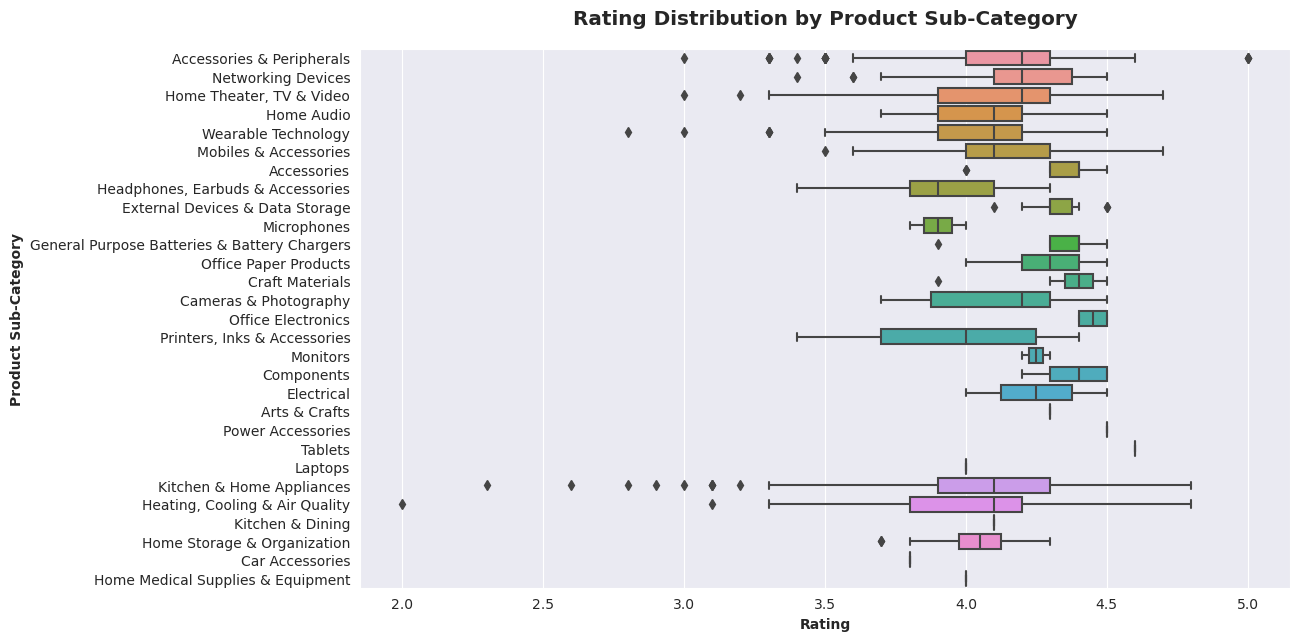

In [43]:
#Rating Distribution by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(ax=ax, data=df1, x='rating', y='category_2')
ax.set_xlabel('Rating', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Rating Distribution by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

In the Rating Distribution by Product Sub-Category graph, I have noticed that the highest rated product comes from the sub category of Accessories & Peripherals. The lowest rated product comes from the sub category of Heating, Cooling & Air Quality.

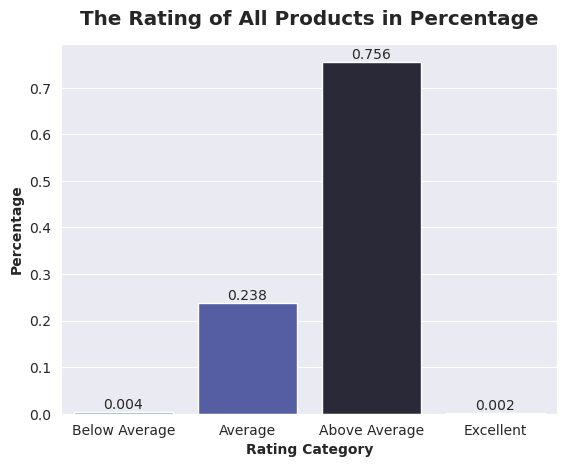

In [44]:
#The Rating of All Products in Percentage

rating_ordered = ['Below Average', 'Average', 'Above Average', 'Excellent']
rating_count = df1['rating_score'].value_counts(normalize=True).rename_axis('rating').reset_index(name='counts')
rating_count['counts'] = rating_count['counts'].round(3)
rating_count_plot = sns.barplot(data=rating_count, x='rating', y='counts', order=rating_ordered)
rating_count_plot.set_xlabel('Rating Category', fontweight='bold')
rating_count_plot.set_ylabel('Percentage', fontweight='bold')
rating_count_plot.set_title('The Rating of All Products in Percentage', fontweight='heavy', size='x-large', y=1.03)


rating_count_plot.bar_label(rating_count_plot.containers[0])

plt.show()

Most of the products in this dataset have been rated Above Average. There are extremely few products that are rated Below Average and Excellent. No products are rated as Poor in this dataset.

In [45]:
#Pivot table of Rating

def p25(g):
    return np.percentile(g, 25)
def p75(g):
    return np.percentile(g, 75)

rating_pivot = df1.pivot_table(values=['rating', 'rating_count'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

rating_pivot = rating_pivot.rename(columns = {'rating':'Rating', 'rating_count': 'Rating Count', 'median':'Median', 'mean':'Mean'}, index={'category_1': 'Main Category', 'category_2': 'Sub Category'})

rating_pivot 

p25  \
                                                                     Rating   
category_1              category_2                                            
Car & Motorbike         Car Accessories                               3.800   
Computers & Accessories Accessories & Peripherals                     4.000   
                        Components                                    4.300   
                        External Devices & Data Storage               4.300   
                        Laptops                                       4.000   
                        Monitors                                      4.225   
                        Networking Devices                            4.100   
                        Printers, Inks & Accessories                  3.700   
                        Tablets                                       4.600   
Electronics             Accessories                                   4.300   
                        Cameras & Photography                         3.875   
                        General Purpose Batteries & Battery Chargers  4.300   
                        Headphones, Earbuds & Accessories             3.800   
                        Home Audio                                    3.900   
                        Home Theater, TV & Video                      3.900   
                        Mobiles & Accessories                         4.000   
                        Power Accessories                             4.500   
                        Wearable Technology                           3.900   
Health & PersonalCare   Home Medical Supplies & Equipment             4.000   
Home & Kitchen          Craft Materials                               4.350   
                        Heating, Cooling & Air Quality                3.800   
                        Home Storage & Organization                   3.975   
                        Kitchen & Dining                              4.100   
                        Kitchen & Home Appliances                     3.900   
Home Improvement        Electrical                                    4.125   
Musical Instruments     Microphones                                   3.850   
Office Products         Office Electronics                            4.400   
                        Office Paper Products                         4.200   
Toys & Games            Arts & Crafts                                 4.300   

                                                                                   \
                                                                     Rating Count   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   1118.00   
Computers & Accessories Accessories & Peripherals                             NaN   
                        Components                                        2515.00   
                        External Devices & Data Storage                  19747.50   
                        Laptops                                            323.00   
                        Monitors                                          2166.25   
                        Networking Devices                               10281.75   
                        Printers, Inks & Accessories                      3435.50   
                        Tablets                                           2886.00   
Electronics             Accessories                                      67259.00   
                        Cameras & Photography                             5384.25   
                        General Purpose Batteries & Battery Chargers      1269.50   
                        Headphones, Earbuds & Accessories                 9881.75   
                        Home Audio                                        2625.75   
                        Home Theater, TV & Video                           426.50   
             

Above is the specific data on ratings and the amount of rating for each Main and Sub Category of Products from the dataset.



## Observation 4: Reviewers

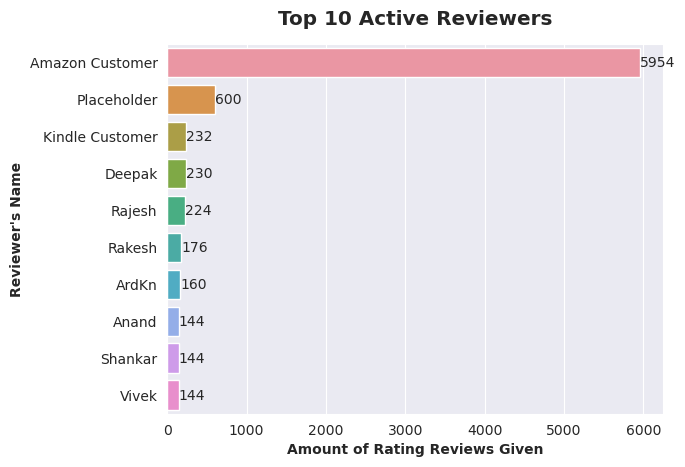

In [46]:
#Reviewers who gave ratings and reviews for more than one product

top_reviewer = data=df2['user_name'].value_counts().head(10).rename_axis('username').reset_index(name='counts')
top_review_plot = sns.barplot(data=top_reviewer, x='counts', y='username')
top_review_plot.bar_label(top_review_plot.containers[0])

top_review_plot.set_xlabel('Amount of Rating Reviews Given', fontweight='bold')
top_review_plot.set_ylabel("Reviewer's Name", fontweight='bold')
top_review_plot.set_title('Top 10 Active Reviewers', fontweight='heavy', size='x-large', y=1.03)

plt.show()

We can see that there are more than 500 people who reviewed a product and give rating anonymously under the alias of Amazon Customer, Place Holder, and Kindle Customer.

There are more than 8 people who have given ratings and reviews to more than 10 products on this dataset.

## Observation 5: Product Pricing

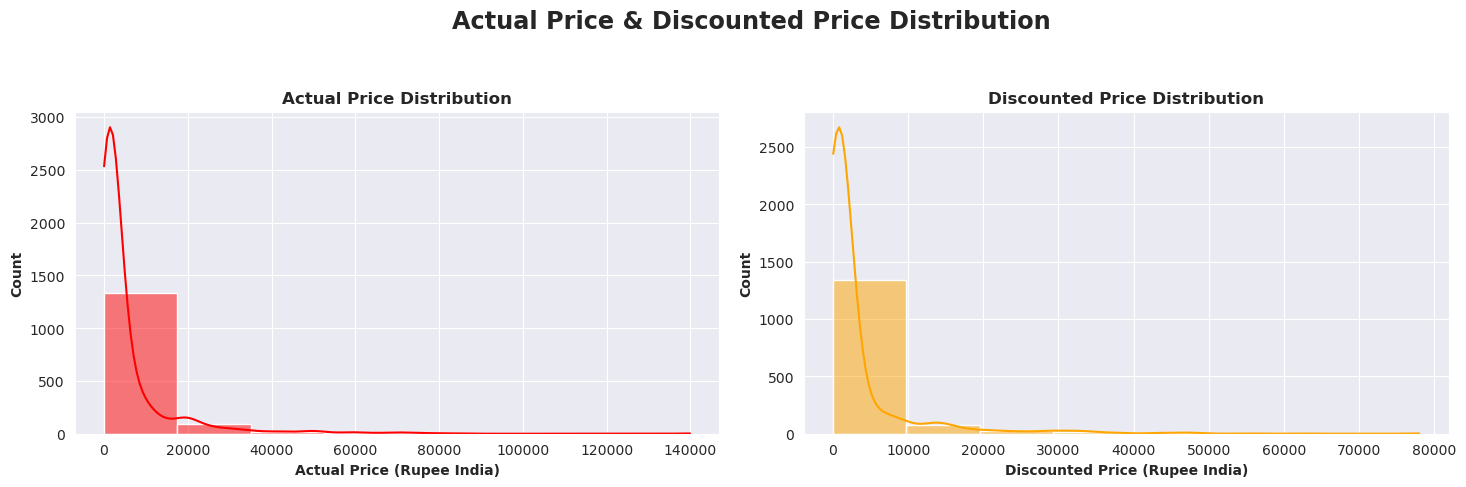

In [47]:
#Actual Price & Discounted Price Distribution

fig, ax = plt.subplots(1, 2, figsize=(15, 5))
fig.suptitle('Actual Price & Discounted Price Distribution', fontweight='heavy', size='xx-large')
fig.tight_layout(pad=3.0)
sns.histplot(ax=ax[0], data=df1, x='actual_price', bins=8, kde=True, color='red')
sns.histplot(ax=ax[1], data=df1, x='discounted_price', bins=8, kde=True, color='orange')
ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Count', fontweight='bold')
ax[1].set_ylabel('Count', fontweight='bold')
ax[0].set_title('Actual Price Distribution', fontweight='bold')
ax[1].set_title('Discounted Price Distribution', fontweight='bold')

plt.show()

Both graphs show the same distribution which is Right or Positvely Skewed.



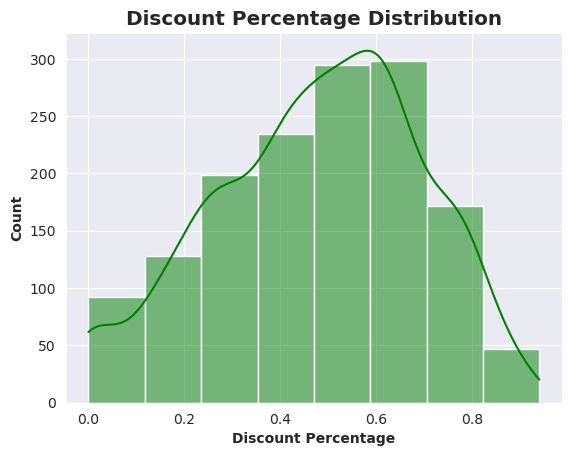

In [48]:
#Discount Percentage Distribution

disc_hist = sns.histplot(data=df1, x='discount_percentage', bins=8, kde=True, color='green')
disc_hist.set_xlabel('Discount Percentage', fontweight='bold')
disc_hist.set_ylabel('Count', fontweight='bold')
disc_hist.set_title('Discount Percentage Distribution', fontweight='heavy', size='x-large')

plt.show()

Most products on the dataset have discounts at around 50% - 70%.

In [49]:
#Specific Details about the Discount Percentage
df1['discount_percentage'].describe()

count    1465.000000
mean        0.476915
std         0.216359
min         0.000000
25%         0.320000
50%         0.500000
75%         0.630000
max         0.940000
Name: discount_percentage, dtype: float64

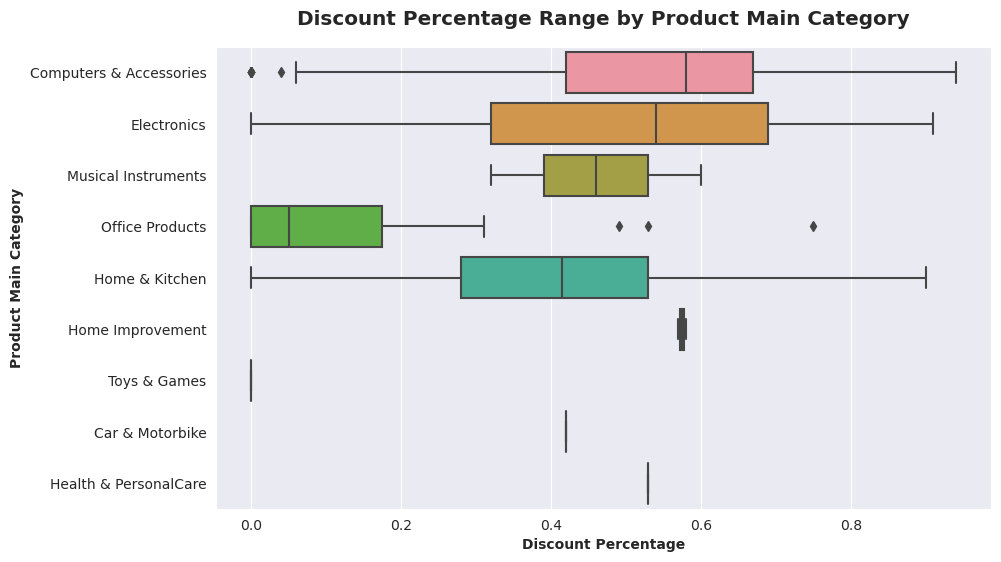

In [50]:
# The Discount Range by Product Main Category

fig, ax = plt.subplots(figsize=(10, 6))
sns.boxplot(data=df1, x='discount_percentage', y='category_1')

ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Main Category', fontweight='bold')
ax.set_title('Discount Percentage Range by Product Main Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

Computers & Accessories, Electronics and Home & Kitchen products have a large spread of discount variation ranging a minimal of 0% to more than 90% discount.

Toys & Games, Cars & Motorbikes, Health & Personal Care, and Home Improvement have the least spread of discount variation.

Office Products does not give a large amount of discount compared to other products in the Main Category.

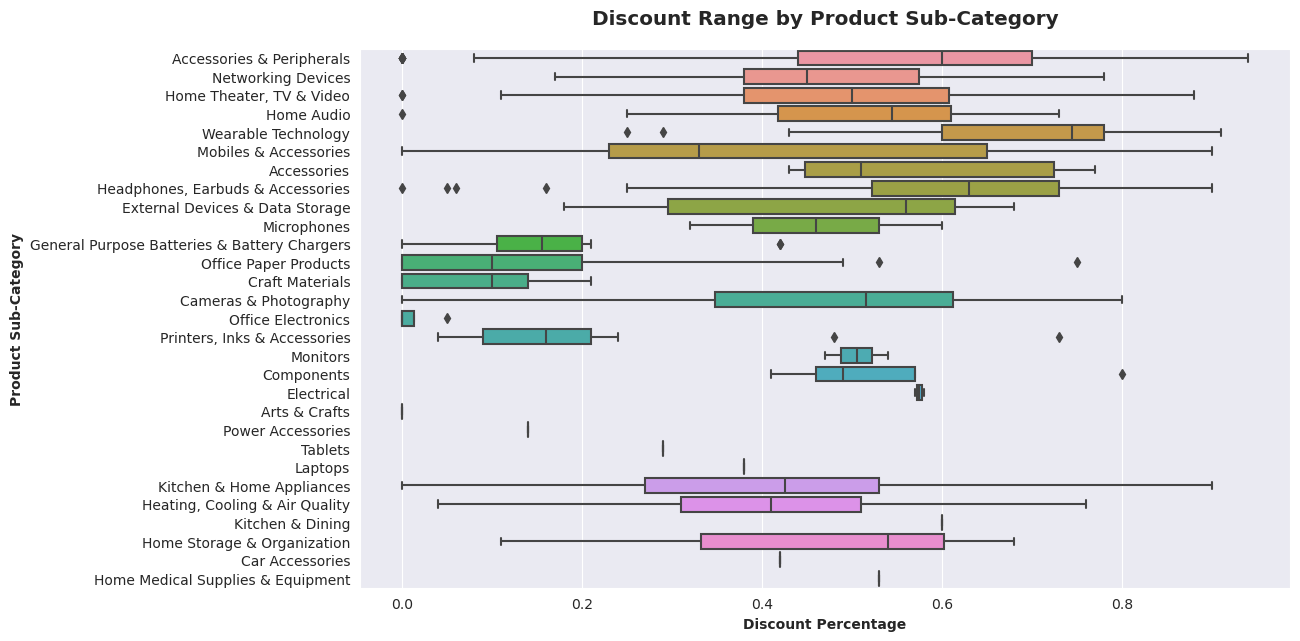

In [51]:
# The Discount Range by Product Sub-Category

fig, ax = plt.subplots(figsize=(12, 7))
sns.boxplot(data=df1, x='discount_percentage', y='category_2')
ax.set_xlabel('Discount Percentage', fontweight='bold')
ax.set_ylabel('Product Sub-Category', fontweight='bold')
ax.set_title('Discount Range by Product Sub-Category', fontweight='heavy', size='x-large', y=1.03)

plt.show()

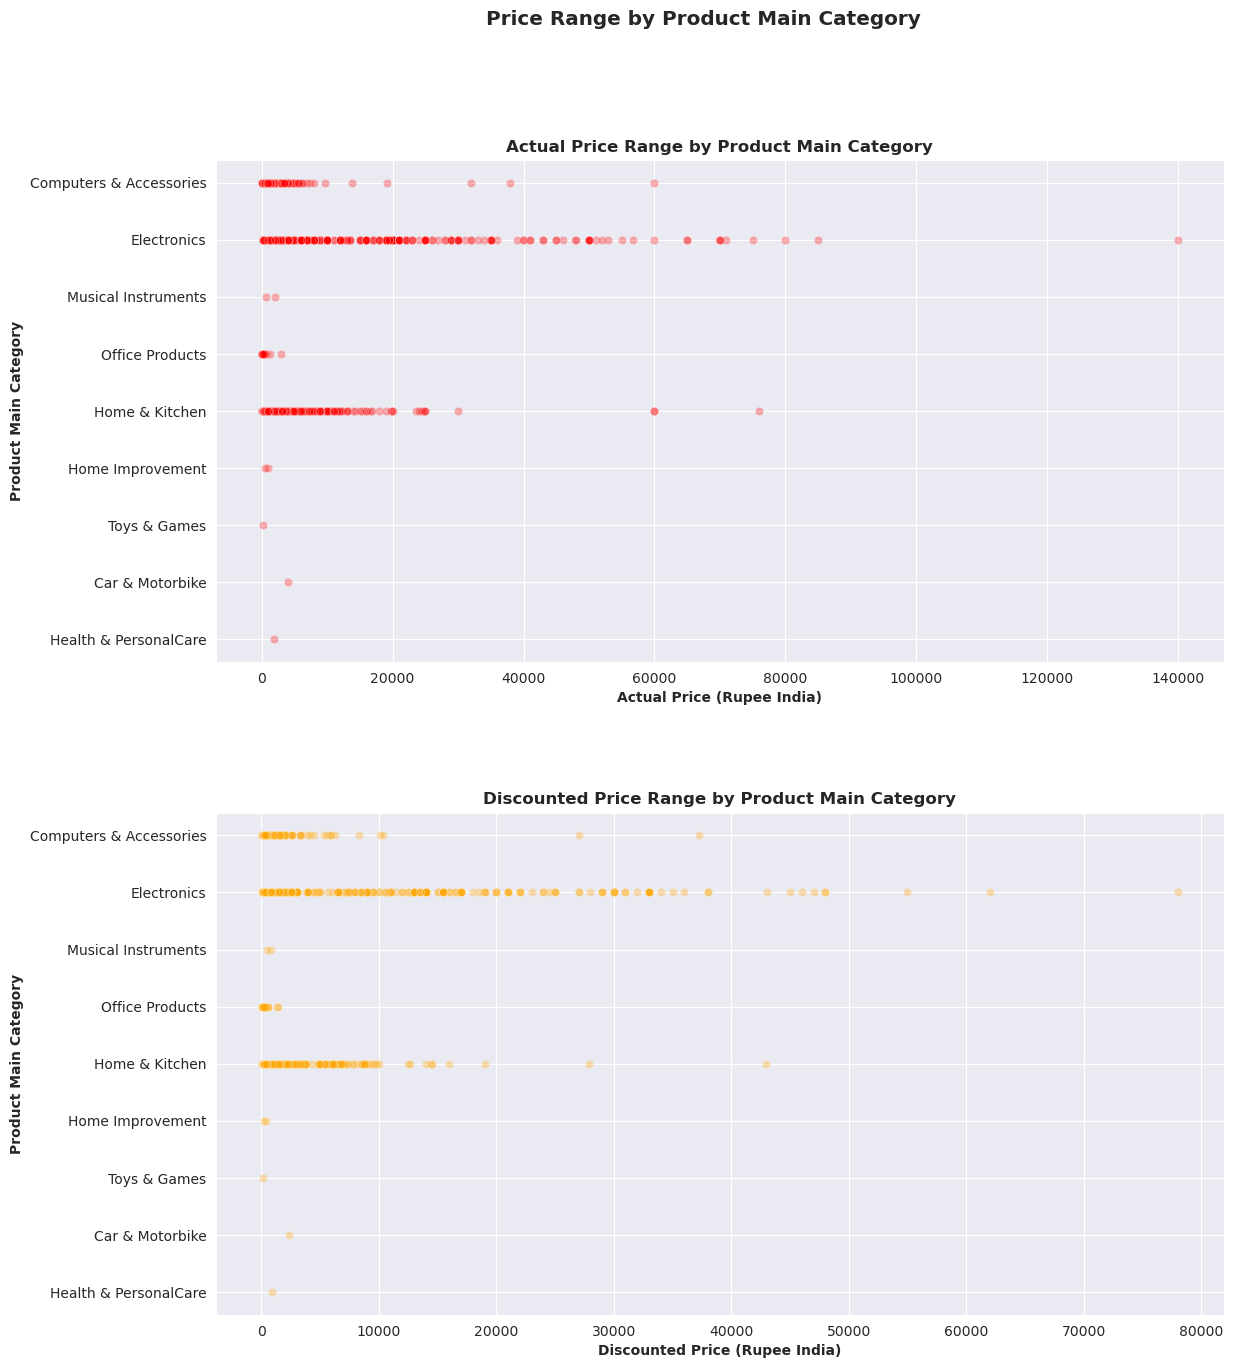

In [52]:
#Actual Price Range and Discounted Price Range by Product Main Category

fig, ax = plt.subplots(2, 1, figsize=(13,15))

fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')

sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_1', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_1', alpha=0.3, color='orange')

ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product Main Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Main Category', fontweight='bold')

ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Main Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Main Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.3)

plt.show()

There is a significant decrease in price after discount especially in the Electronics Category. Most of the product's actual price falls below 20,000 Rupee. For the discounted price, most of the products fall under 10,000 Rupee.

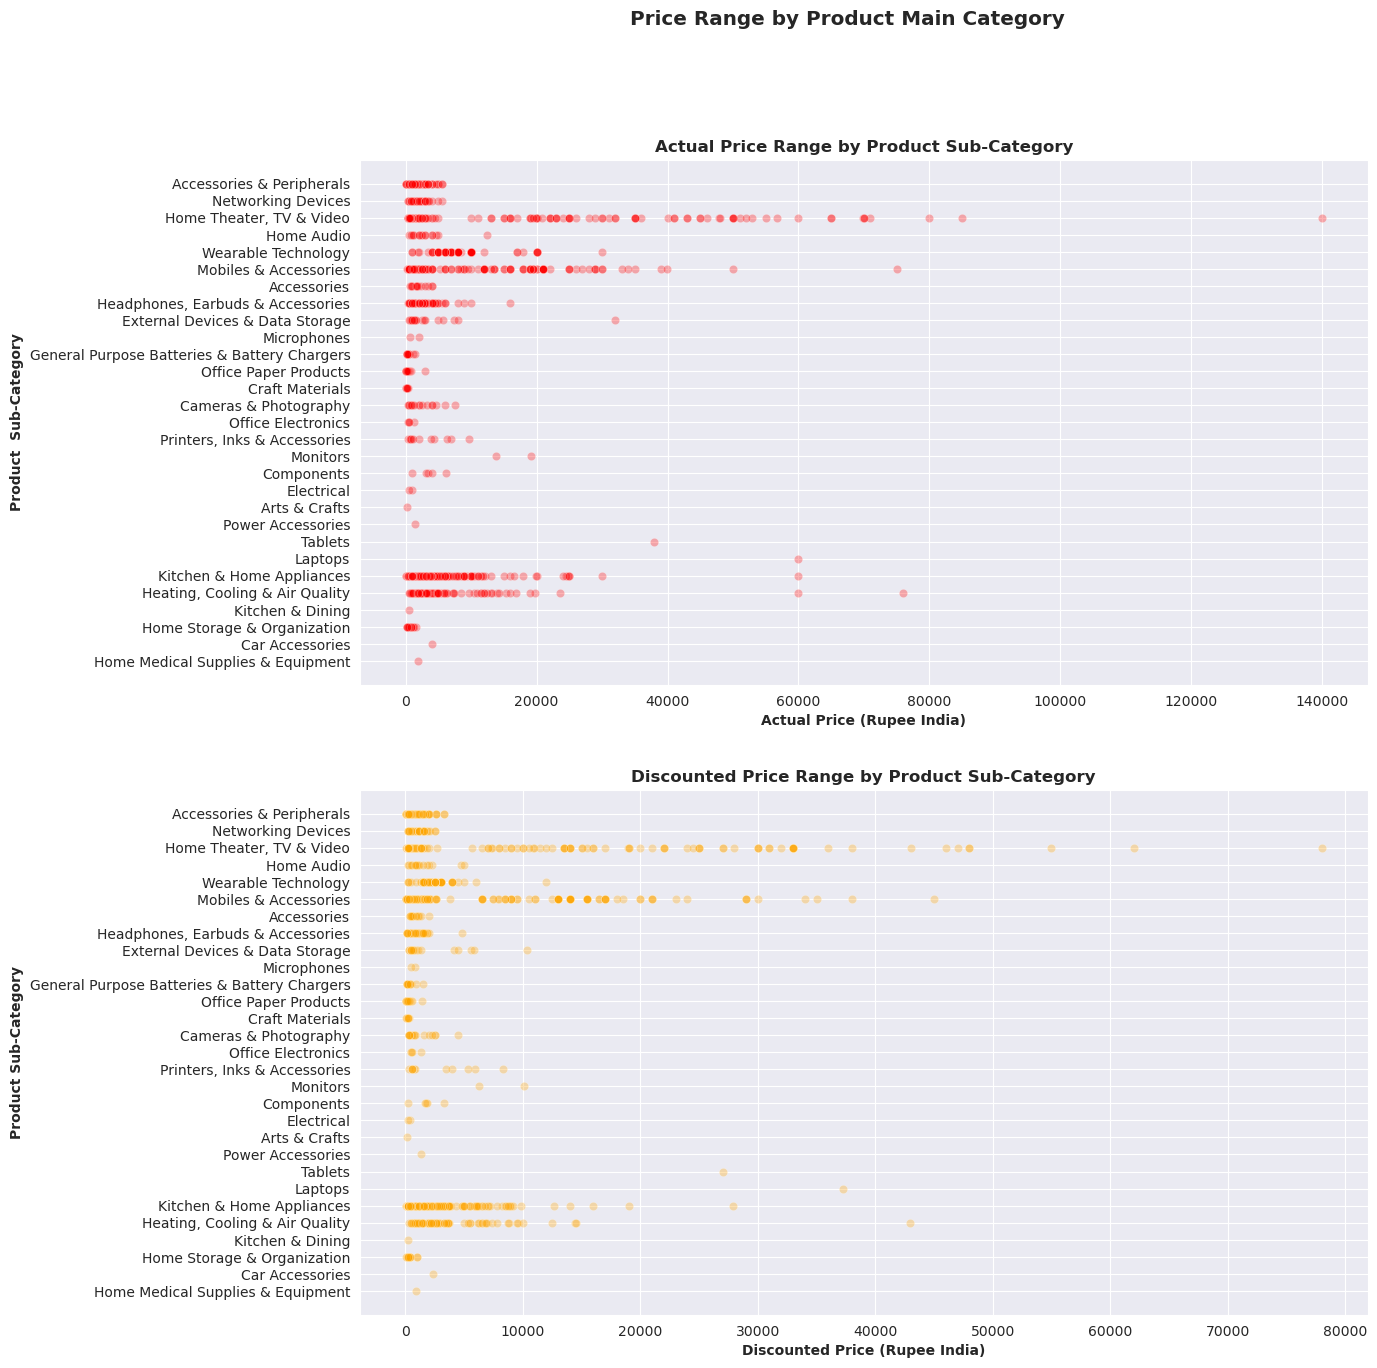

In [53]:
#Actual Price Range and Discounted Price Range by Product Sub Category

fig, ax = plt.subplots(2, 1, figsize=(13, 15))
fig.suptitle('Price Range by Product Main Category', fontweight='heavy', size='x-large')
sns.scatterplot(ax=ax[0], data=df1, x='actual_price', y='category_2', alpha=0.3, color='red')
sns.scatterplot(ax=ax[1], data=df1, x='discounted_price', y='category_2', alpha=0.3, color='orange')
ax[0].set_xlabel('Actual Price (Rupee India)', fontweight='bold')
ax[0].set_ylabel('Product  Sub-Category', fontweight='bold')
ax[0].set_title('Actual Price Range by Product Sub-Category', fontweight='bold')
ax[1].set_xlabel('Discounted Price (Rupee India)', fontweight='bold')
ax[1].set_ylabel('Product Sub-Category', fontweight='bold')
ax[1].set_title('Discounted Price Range by Product Sub-Category', fontweight='bold')

plt.subplots_adjust(hspace = 0.2)

plt.show()

In [54]:
#Pivot table of Prices

def p25(g):
    return np.percentile(g, 25)

def p75(g):
    return np.percentile(g, 75)

actual_price_pivot = df1.pivot_table(values=['actual_price', 'discounted_price'], index=['category_1', 'category_2'], aggfunc=([p25, np.median, np.mean, p75]))

actual_price_pivot

p25  \
                                                                     actual_price   
category_1              category_2                                                  
Car & Motorbike         Car Accessories                                   4000.00   
Computers & Accessories Accessories & Peripherals                          499.00   
                        Components                                        3100.00   
                        External Devices & Data Storage                   1074.25   
                        Laptops                                          59890.00   
                        Monitors                                         15090.00   
                        Networking Devices                                1208.00   
                        Printers, Inks & Accessories                       811.00   
                        Tablets                                          37999.00   
Electronics             Accessories                                       1150.00   
                        Cameras & Photography                              946.00   
                        General Purpose Batteries & Battery Chargers       205.00   
                        Headphones, Earbuds & Accessories                  999.00   
                        Home Audio                                        1274.00   
                        Home Theater, TV & Video                           824.00   
                        Mobiles & Accessories                             1299.00   
                        Power Accessories                                 1499.00   
                        Wearable Technology                               5999.00   
Health & PersonalCare   Home Medical Supplies & Equipment                 1900.00   
Home & Kitchen          Craft Materials                                    132.50   
                        Heating, Cooling & Air Quality                    1990.00   
                        Home Storage & Organization                        374.00   
                        Kitchen & Dining                                   495.00   
                        Kitchen & Home Appliances                         1000.00   
Home Improvement        Electrical                                         699.00   
Musical Instruments     Microphones                                       1023.00   
Office Products         Office Electronics                                 511.25   
                        Office Paper Products                              120.00   
Toys & Games            Arts & Crafts                                      150.00   

                                                                                       \
                                                                     discounted_price   
category_1              category_2                                                      
Car & Motorbike         Car Accessories                                       2339.00   
Computers & Accessories Accessories & Peripherals                              199.00   
                        Components                                            1709.00   
                        External Devices & Data Storage                        504.00   
                        Laptops                                              37247.00   
                        Monitors                                              7249.00   
                        Networking Devices                                     530.00   
                        Printers, Inks & Accessories                           597.00   
                        Tablets                                              26999.00   
Electronics             Accessories                                            479.00   
                        Cameras & Photography                                  386.50   
                        General Purpose Batteries & Battery Chargers           166.75   
                      

category_1 refers to the Main Category

category_2 refers to the Sub-Category

In [55]:
df1.head(5)

,product_id,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,category_1,category_2,rating_score,difference_price
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,0.64,4.2,24269.0,Computers & Accessories,Accessories & Peripherals,Above Average,700.0
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,0.43,4.0,43994.0,Computers & Accessories,Accessories & Peripherals,Above Average,150.0
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,0.90,3.9,7928.0,Computers & Accessories,Accessories & Peripherals,Average,1700.0
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,0.53,4.2,94363.0,Computers & Accessories,Accessories & Peripherals,Above Average,370.0
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,0.61,4.2,16905.0,Computers & Accessories,Accessories & Peripherals,Above Average,245.0


In [56]:
#Extracting Independent and Dependent Variables
 
X = df1.iloc[:, 5].values.reshape(-1, 1) # actual price
y = df1.iloc[:, 4].values.reshape(-1, 1) # discouted price

In [57]:
#Splitting the dataset into the Training Set and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [58]:
#Fitting Simple Linear Regression to the Training Set

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [59]:
print(reg.coef_)
print(reg.intercept_)

[[-0.1178852]]
[0.95724029]


In [60]:
#Calculating the R Squared Value

from sklearn.metrics import r2_score
y_pred = reg.predict(X_test)
print('R2 Score: ', r2_score(y_test, y_pred))

R2 Score:  0.018737472546554


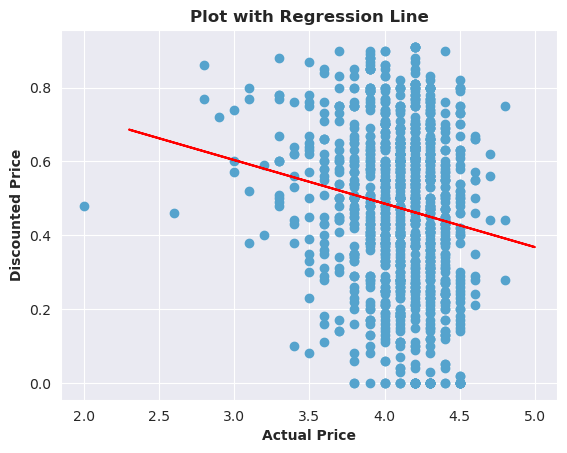

In [61]:
#Scatter Plot with Regression Line

plt.scatter(X_train, y_train)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Actual Price', fontweight='bold')
plt.ylabel('Discounted Price', fontweight='bold')
plt.title('Plot with Regression Line', fontweight='bold')
plt.show()

In [62]:
#Cross Validation Result

from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits=10, shuffle=True, random_state=21)
cv_results = cross_val_score(reg, X, y, cv=kf)

print('Cross Validation Results Mean: ', cv_results.mean())

Cross Validation Results Mean:  0.018715473373936385


In [63]:
#Filling in some missing values from Rating Count Column

df1['rating_count'].fillna(df1['rating_count'].mode()[0], inplace=True)

In [64]:
#Lasso Regression

from sklearn.linear_model import Lasso

Xl = df1[['actual_price', 'rating', 'rating_count']]
yl = df1['discounted_price']

Xl_train, Xl_test, yl_train, yl_test = train_test_split(Xl, yl, random_state = 21, test_size = 0.3)

lasso = Lasso(alpha = 0.1)
lasso.fit(Xl_train, yl_train)
ridge_predict = lasso.predict(Xl_test)
print('Lasso score: ',lasso.score(Xl_test, yl_test))
print('Lasso coefficients: ',lasso.coef_)

Lasso score:  0.9239335096300123
Lasso coefficients:  [5.95605560e-01 1.54610535e+02 4.03305120e-04]


In [65]:
#Ridge Regression

from sklearn.linear_model import Ridge

ridge = Ridge(alpha = 0.1)
ridge.fit(Xl_train, yl_train)
ridge_predict = ridge.predict(Xl_test)
print('Ridge score: ',ridge.score(Xl_test, yl_test))

Ridge score:  0.923932503057468


In [66]:
#Linear Regression with 3 Predictors

reg2 = LinearRegression()
reg2.fit(Xl_train, yl_train)

yl_pred = reg2.predict(Xl_test)
print('R2 Score: ', r2_score(yl_test, yl_pred))

R2 Score:  0.9239323224150353


In [67]:
#Applying Preprocessing using Standard Scaler

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X2 = df1[['actual_price', 'rating', 'rating_count']]
y2 = df1['discounted_price']

X2 = scaler.fit_transform(X2)

X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,random_state = 21, test_size = 0.3)

regss = LinearRegression()
regss.fit(X2_train, y2_train)

y2_pred = regss.predict(X2_test)
print('R2 Score: ', r2_score(y2_test, y2_pred))

R2 Score:  0.9239323224149191


# Evaluating Simple Linear Regression Model¶

There are a few requirements that must be met to make a successful Linear Regression Model

Linear Relationship between the dependent and independent variables
Normally distributed in error component
No multicollinearity, instability of regression coefficients
No heteroskedasticity, the variance the residuals must be constant across the predicted balues


In [68]:
ols_data = df1[['discounted_price', 'actual_price']]

In [69]:
ols_formula = 'discounted_price ~ actual_price'

In [70]:
#Importing ols function
from statsmodels.formula.api import ols
OLS = ols(formula = ols_formula, data=ols_data)
model = OLS.fit()

In [71]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       discounted_price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                 1.812e+04
Date:                Sat, 26 Aug 2023   Prob (F-statistic):               0.00
Time:                        11:34:02   Log-Likelihood:                -13137.
No. Observations:                1465   AIC:                         2.628e+04
Df Residuals:                    1463   BIC:                         2.629e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -219.2597     55.486     -3.952      0.000    -328.099    -110.420
actual_price     0.6142      0.005    134.600      0.000       0.605       0.623
==============================================================================
Omnibus:                      521.405   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            62749.178
Skew:                          -0.600   Prob(JB):                         0.00
Kurtosis:                      35.040   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The summary states that there is strong multicollinearity. If I were to use this linear regression model for a prediction it does not matter if it has a strong multicollinearity. This is the purpose of the Linear regression model, thus the requirement has been met.

If I were to use the linear regression model to measure the influence of the independent variable to the depedent variable, there must not have strong multicollinearity.

In [72]:
#Subset X Variable
X_ols = ols_data['actual_price']

#Get Prediction From Models
fitted_values = model.predict(X_ols)

#Calculate residuals
residuals = model.resid

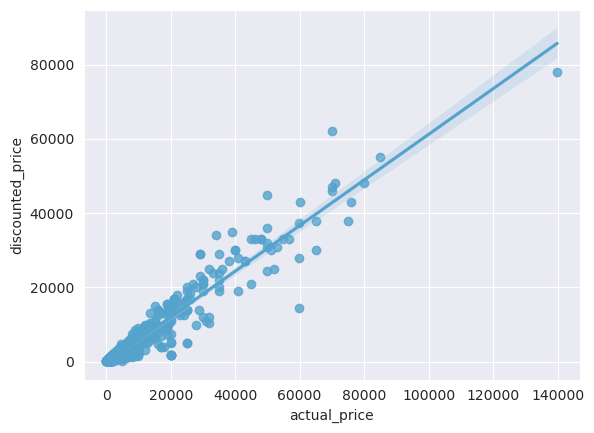

In [73]:
sns.regplot(data=ols_data, x='actual_price', y='discounted_price')

plt.show()

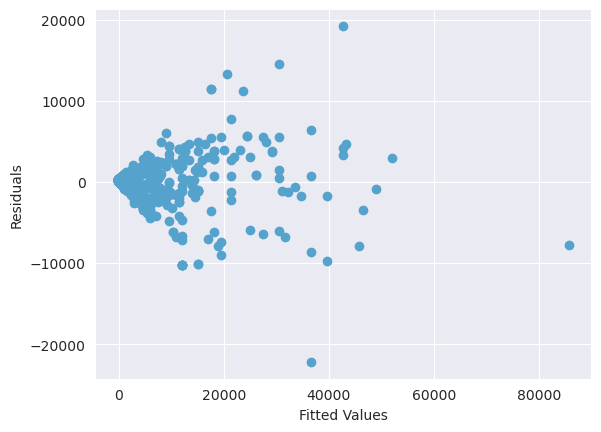

In [74]:
#Checking for Homoscedasticity

plt.scatter(fitted_values, residuals)

plt.xlabel('Fitted Values')
plt.ylabel('Residuals')

plt.show()

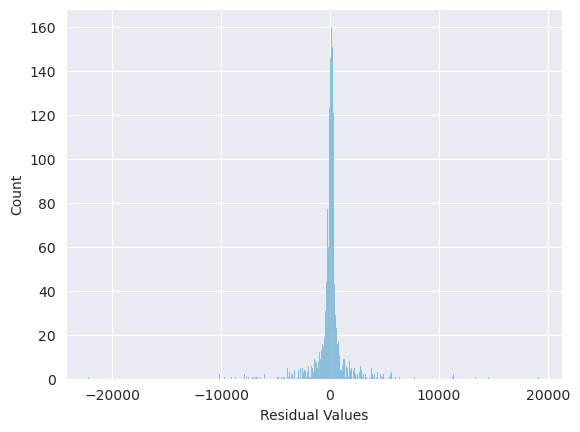

In [75]:
#Checking for Normal Distribution of the Error
ax = sns.histplot(residuals)
ax.set_xlabel('Residual Values')
plt.show()

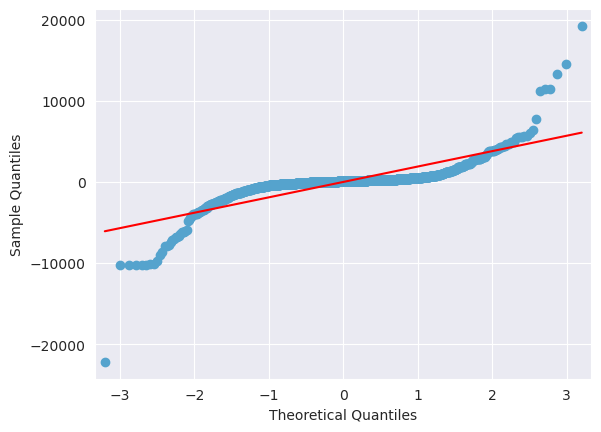

In [76]:
#Quantile-Quantile Plot

import statsmodels.api as sm

ax = sm.qqplot(model.resid, line='s')

plt.show()

To check for normal distribution of the error, the data points need to be close to the line. From the above plot we can see that there are many data points that are further from the line. This requirement of linear regression is Not Met.

In conclusion, there are more than two requirements that are not met for the Linear Regression Model. The requirements are

No heteroskedasticity
Normally distributed Error component
Thus this Simple Linear Regression Model should not be used.

# Sentiment Analysis

In [77]:
#Subsetting Reviews
df3 = df[['product_id','review_title','review_content']]

In [78]:
!pip install twython

In [79]:
#importing packages for Sentiment Analysis

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [80]:
#Running the polarity Score on the entire dataset
res = {}

for i, row in tqdm(df3.iterrows(), total=len(df3)):
    review_desc =row['review_content']
    myid = row['product_id']
    res[myid] = sia.polarity_scores(review_desc)

  0%|          | 0/1465 [00:00<?, ?it/s]

In [81]:
pol_score = pd.DataFrame(res).T
pol_score = pol_score.reset_index().rename(columns={'index' : 'product_id'})

In [82]:
#Merging the Dataframe with Polarity Scor
df4 = df1.merge(pol_score, how='left')

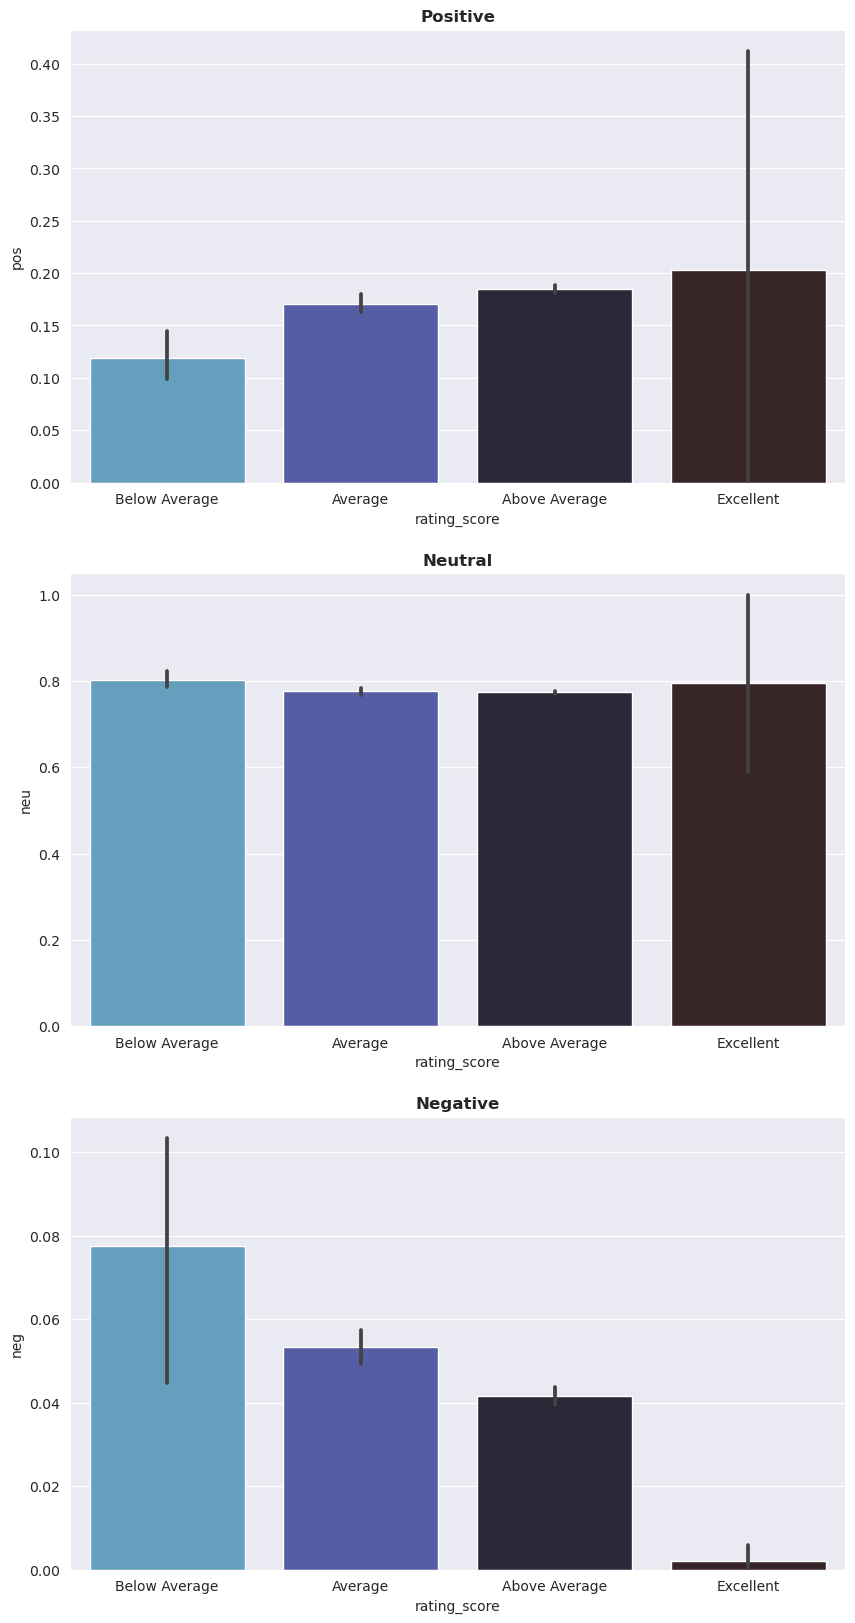

In [83]:
#Comparing Results of the Sentiment Analysis with the Rating 

fig, ax = plt.subplots(3,1, figsize=(10,20))

sns.barplot(data=df4, x='rating_score', y='pos', ax=ax[0])
sns.barplot(data=df4, x='rating_score', y='neu', ax=ax[1])
sns.barplot(data=df4, x='rating_score', y='neg', ax=ax[2])

ax[0].set_title('Positive', fontweight = 'bold')
ax[1].set_title('Neutral', fontweight = 'bold')
ax[2].set_title('Negative', fontweight = 'bold')

plt.show()

From the Sentiment Analysis, we can see that the amount of positive words being used in reviews as the rating goes up increases.

The amount of negative words being used in reviews as the rating goes up drastically decreases.

In [84]:
#Statistical Description on the Sentiment Score

sentiment_score = df4[['pos', 'neu', 'neg', 'compound']]
sentiment_score.describe()[1:7]

,pos,neu,neg,compound
mean,0.181514,0.774021,0.044465,0.823359
std,0.073551,0.071469,0.036994,0.362241
min,0.000000,0.465000,0.000000,-0.983500
25%,0.131000,0.734000,0.019000,0.871900
50%,0.172000,0.782000,0.039000,0.960900
75%,0.224000,0.822000,0.063000,0.987900


In [85]:
df4.to_csv('Sales Amazon Cleaned.csv')

In [86]:
final_df = df2.merge(df4, on="product_id", how="left")

print(final_df)

                             user_id  product_id         user_name  \
0       AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1             Manav   
1       AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1             Manav   
2       AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1             Manav   
3       AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1      Adarsh gupta   
4       AG3D6O4STAQKAY2UVGEUV46KN35Q  B07JW9H4J1      Adarsh gupta   
...                              ...         ...               ...   
151804  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6           PARDEEP   
151805  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6  Anindya Pramanik   
151806  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6       Vikas Singh   
151807  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6   Harshada Pimple   
151808  AGEFL3AY7YXEFZA4ZJU3LP7K7OJQ  B01486F4G6            Saw a.   

                                             product_name  discounted_price  \
0       Wayona Nylon Braided USB to Lightning Fast Cha...             399.0   
1

In [87]:
final_df.to_csv('Sales_Amazon_Cleaned_final.csv')

# Debug

In [58]:
import pandas as pd

data = [
[ "id1,id2,id3","Vy, Hai, Thien","product1"],
[ "id1,id4,id5","Vy, Kiet, Dat","product2"],
["id3,id7,id8","Thien, Tuan, Ngoc","product3"]
]

df = pd.DataFrame(data, columns = ["user_id","user_name", "product_id"])
df

,user_id,user_name,product_id
0,"id1,id2,id3","Vy, Hai, Thien",product1
1,"id1,id4,id5","Vy, Kiet, Dat",product2
2,"id3,id7,id8","Thien, Tuan, Ngoc",product3


In [59]:
# Tách các giá trị trong cột "user_id" thành danh sách
df["user_id"] = df["user_id"].str.split(",")

# Chuyển đổi các giá trị trong cột "user_id" và "product_id" thành các bản ghi riêng biệt
expanded_rows = []
for index, row in df.iterrows():
    user_ids = row["user_id"]
    product_id = row["product_id"]
    for user_id in user_ids:
        expanded_rows.append({"user_id": user_id, "product_id": product_id})

# Tạo một DataFrame mới từ danh sách các bản ghi đã được mở rộng
expanded_df = pd.DataFrame(expanded_rows)

print(expanded_df)

  user_id product_id
0     id1   product1
1     id2   product1
2     id3   product1
3     id1   product2
4     id4   product2
5     id5   product2
6     id3   product3
7     id7   product3
8     id8   product3


In [60]:
# Tách các giá trị trong cột "user_id" thành danh sách
df["user_name"] = df["user_name"].str.split(",")

# Chuyển đổi các giá trị trong cột "user_id" và "product_id" thành các bản ghi riêng biệt
expanded_rows = []
for index, row in df.iterrows():
    user_ids = row["user_name"]
    product_id = row["product_id"]
    for user_id in user_ids:
        expanded_rows.append({"user_name": user_id, "product_id": product_id})

# Tạo một DataFrame mới từ danh sách các bản ghi đã được mở rộng
expanded_df = pd.DataFrame(expanded_rows)

print(expanded_df)

  user_name product_id
0        Vy   product1
1       Hai   product1
2     Thien   product1
3        Vy   product2
4      Kiet   product2
5       Dat   product2
6     Thien   product3
7      Tuan   product3
8      Ngoc   product3


In [96]:
product_info_data = {
    "product_id": ["product1", "product2", "product3"],
    "product_name": ["Product A", "Product B", "Product C"],
    "price": [10, 20, 15]
}

product_info_df = pd.DataFrame(product_info_data)
product_info_df

,product_id,product_name,price
0,product1,Product A,10
1,product2,Product B,20
2,product3,Product C,15


In [97]:
# Sử dụng pd.merge() để gộp thông tin từ product_info_df vào expanded_df dựa trên cột "product_id"
final_df = expanded_df.merge(product_info_df, on="product_id", how="left")

print(final_df)

  user_name product_id product_name  price
0        Vy   product1    Product A     10
1       Hai   product1    Product A     10
2     Thien   product1    Product A     10
3        Vy   product2    Product B     20
4      Kiet   product2    Product B     20
5       Dat   product2    Product B     20
6     Thien   product3    Product C     15
7      Tuan   product3    Product C     15
8      Ngoc   product3    Product C     15
